<a href="https://colab.research.google.com/github/anshu2308/java-car-parking-system/blob/master/SMS_spam_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [160]:
import pandas as pd
import numpy as np


In [161]:
#load the data
from google.colab import files
uploaded= files.upload()

Saving mail_data.csv to mail_data (1).csv


In [162]:
df =pd.read_csv('mail_data.csv')


In [163]:
df.sample(10)

,Category,Message
895,ham,Doesn't g have class early tomorrow and thus s...
744,ham,Ok. There may be a free gym about.
2029,ham,Kallis is ready for bat in 2nd innings
5188,ham,Okie
2120,ham,I hope you know I'm still mad at you.
3595,spam,Do you want a New Nokia 3510i Colour Phone Del...
300,ham,Need a coffee run tomo?Can't believe it's that...
1196,spam,You have 1 new voicemail. Please call 08719181503
3317,ham,I know girls always safe and selfish know i go...
2101,ham,Oh Howda gud gud.. Mathe en samachara chikku:-)


In [164]:
df.shape

(5572, 2)

In [165]:
#1. Data Cleaning
#2. EDA
#3. Text Processing
#4. Model building
#5. Evaluation
#6. Improvement
#7. Website
#8. Deploy

In [ ]:
## DATA CLEANING

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
#Drop columns
#df.drop(columns=['Unnamed: 0','label_num'],inplace=True)

In [167]:
#Renaming the column
df.rename(columns={'Category':'target','Message':'text'},inplace=True)
df.sample(5)

,target,text
5490,ham,K. I will sent it again
5352,ham,Good morning princess! Have a great day!
3936,ham,You need to get up. Now.
513,ham,Lol ok your forgiven :)
576,spam,"You have won ?1,000 cash or a ?2,000 prize! To..."


In [168]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [169]:
df['target']=encoder.fit_transform(df['target'])

In [170]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [171]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [172]:
#Check for duplicates values
df.duplicated().sum()

415

In [174]:
#Remove duplicates
df=df.drop_duplicates(keep='first')

In [175]:
df.duplicated().sum()

0

In [176]:
df.shape

(5157, 2)

In [ ]:
##EDA(Explolatory Data Analysis)

In [177]:
df.head()


,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [178]:
df['target'].value_counts()

0    4516
1     641
Name: target, dtype: int64

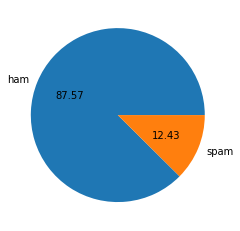

In [179]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'], autopct="%0.2f")
plt.show()

In [ ]:
#Data is imbalanced

In [180]:
import nltk

In [181]:
!pip install nltk

In [182]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [183]:
df['num_characters']= df['text'].apply(len)

In [184]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [185]:
  #num of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [186]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,23
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [187]:
#num of sentences
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [188]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [189]:
df[['num_characters','num_words','num_sentences']].describe() 

,num_characters,num_words,num_sentences
count,5157.000000,5157.000000,5157.000000
mean,79.103936,18.390537,1.965290
std,58.382922,13.307527,1.439549
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,219.000000,38.000000


In [190]:
#ham messages
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()  

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.101417,1.822852
std,56.708301,13.488402,1.374848
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,219.000000,38.000000


In [191]:
#spam messages
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()  

,num_characters,num_words,num_sentences
count,641.000000,641.000000,641.000000
mean,137.118565,27.472699,2.968799
std,30.399707,6.988134,1.486069
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,44.000000,9.000000


In [192]:
#making histograph
import seaborn as sns

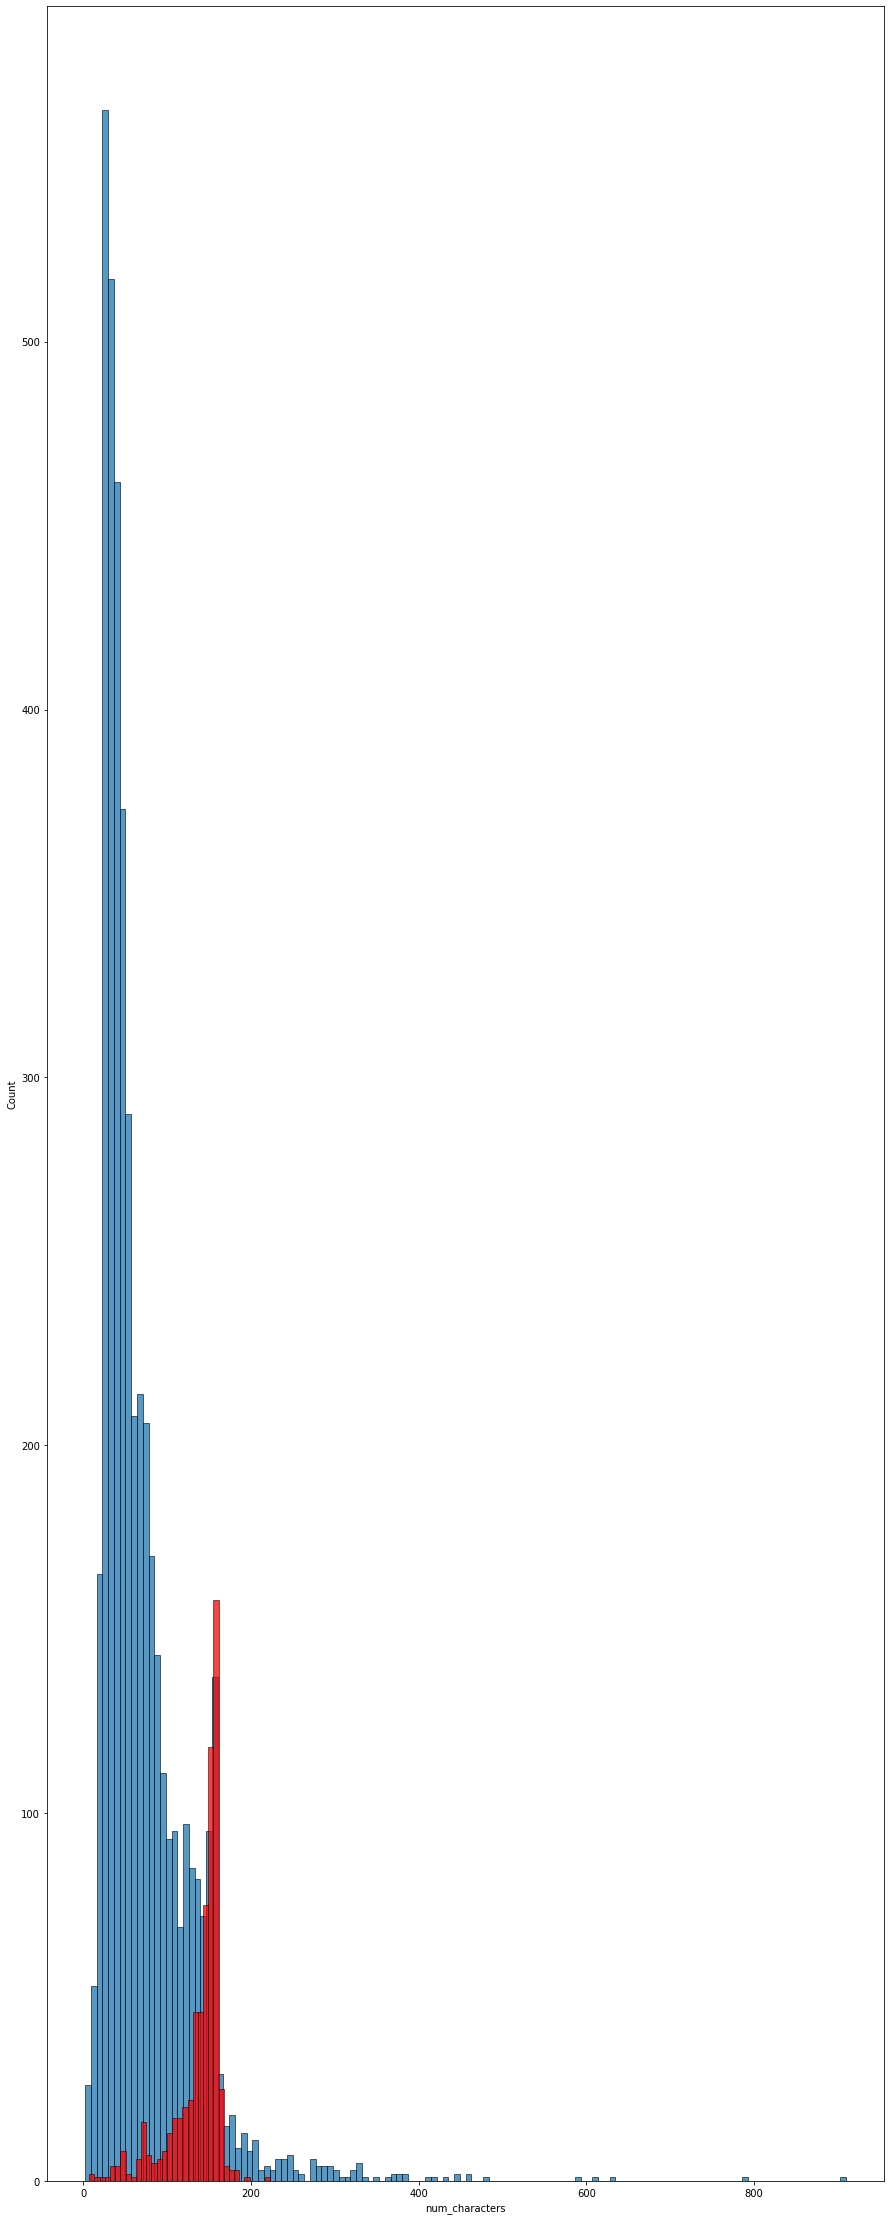

In [290]:
plt.figure(figsize=(15,40))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

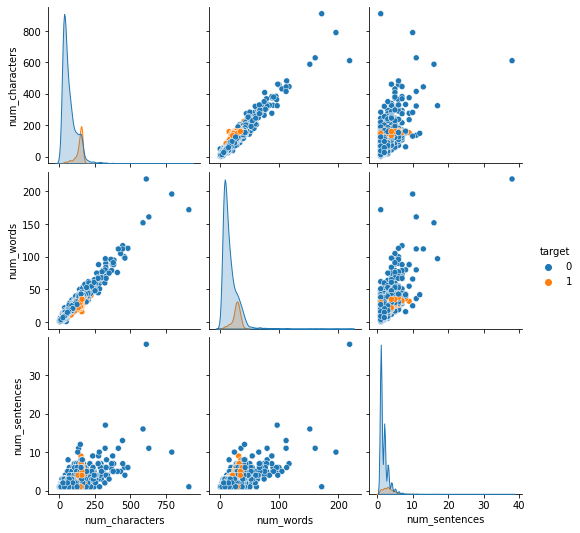

In [194]:
sns.pairplot(df,hue='target')

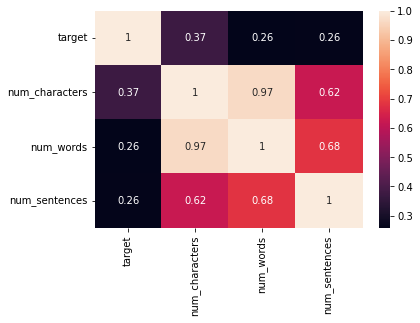

In [195]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
##3.Data Preprocessing
#a.Lowercase
#b.Tokenization
#c.Removing special characters
#d.Removing stop words and punctuation
#e.Stemming

In [196]:
# python -m nltk.downloader stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [197]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [198]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('dancing')

'danc'

In [199]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
             y.append(i)
    text=y[:]  
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english')and i not in string.punctuation:
            y.append(i)
                
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
                
    return " ".join(y)

In [200]:
transform_text('I got 90% in exams!!!')

'got 90 exam'

In [202]:
transform_text('Did you like my presentation on ML?')

'like present ml'

In [203]:
transform_text('I loved the Youtube lectures on Machine Learning .How about you?')

'love youtub lectur machin learn'

In [204]:
df['transformed_text']=df['text'].apply(transform_text)

In [205]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [206]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [207]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

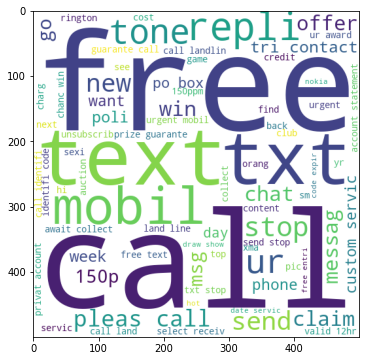

In [208]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [209]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

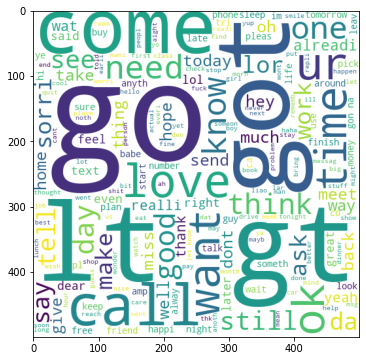

In [210]:
plt.figure(figsize=(55,6))
plt.imshow(ham_wc)

In [211]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [212]:
len(spam_corpus) 

9726

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


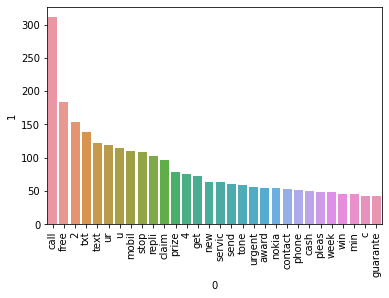

In [61]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical') 
plt.show()  
                                                                                                             

In [213]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [214]:
len(ham_corpus)

35290

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


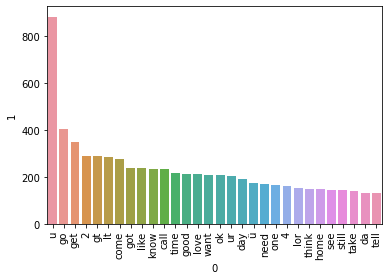

In [215]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical') 
plt.show()  
             

In [ ]:
 ##4.Model Building

In [251]:
#Text Vextorizaztion using Bag of words
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
#cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=5000)

In [252]:
#X=cv.fit_transform(df['transformed_text']).toarray()
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [253]:
X  = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [254]:
X.shape

(5157, 5001)

In [255]:
y=df['target'].values

In [256]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [257]:
from sklearn.model_selection import train_test_split

In [258]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=2)

In [259]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [260]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [261]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
 


0.875
[[791 114]
 [ 15 112]]
0.49557522123893805


In [262]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
print(mnb.predict(X_train))

0.8885658914728682
[[905   0]
 [115  12]]
1.0
[1 0 0 ... 0 0 0]


In [263]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9757751937984496
[[903   2]
 [ 23 104]]
0.9811320754716981


In [264]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [265]:
svc=SVC(kernel='sigmoid', gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)

In [266]:
clfs={
    'SVC':svc,
    'KN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb
}

In [267]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
  clf.fit(X_train,y_train)
  y_pred=clf.predict(X_test)
  accuracy=accuracy_score(y_test,y_pred)
  precision=precision_score(y_test,y_pred)
                            
  return accuracy,precision

In [268]:
train_classifier(svc,X_train,y_train,X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.876937984496124, 0.0)

In [269]:

accuracy_scores=[]
precision_scores=[]

for name,clf in clfs.items():
  current_accuracy,current_precision=train_classifier(clf,X_train,y_train,X_test,y_test)
  print("For",name)
  print("Accuracy -",current_accuracy)
  print("Precision-",current_precision)
  
  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For SVC
Accuracy - 0.876937984496124
Precision- 0.0
For KN
Accuracy - 0.936046511627907
Precision- 0.7479674796747967
For NB
Accuracy - 0.8885658914728682
Precision- 1.0
For DT
Accuracy - 0.9554263565891473
Precision- 0.9354838709677419
For LR
Accuracy - 0.9622093023255814
Precision- 0.9583333333333334
For RF
Accuracy - 0.9738372093023255
Precision- 1.0
For AdaBoost
Accuracy - 0.9660852713178295
Precision- 0.9107142857142857
For BgC
Accuracy - 0.9699612403100775
Precision- 0.9363636363636364
For ETC
Accuracy - 0.9786821705426356
Precision- 1.0
For GBDT
Accuracy - 0.9554263565891473
Precision- 0.9354838709677419
For xgb
Accuracy - 0.9544573643410853
Precision- 0.9347826086956522


In [272]:
performance_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Accuracy',ascending=False)

In [273]:
performance_df

,Algorithm,Accuracy,Precision
8,ETC,0.978682,1.000000
5,RF,0.973837,1.000000
7,BgC,0.969961,0.936364
6,AdaBoost,0.966085,0.910714
4,LR,0.962209,0.958333
3,DT,0.955426,0.935484
9,GBDT,0.955426,0.935484
10,xgb,0.954457,0.934783
1,KN,0.936047,0.747967
2,NB,0.888566,1.000000


In [274]:
performance_df1=pd.melt(performance_df,id_vars="Algorithm")

In [276]:
performance_df1

,Algorithm,variable,value
0,ETC,Accuracy,0.978682
1,RF,Accuracy,0.973837
2,BgC,Accuracy,0.969961
3,AdaBoost,Accuracy,0.966085
4,LR,Accuracy,0.962209
5,DT,Accuracy,0.955426
6,GBDT,Accuracy,0.955426
7,xgb,Accuracy,0.954457
8,KN,Accuracy,0.936047
9,NB,Accuracy,0.888566


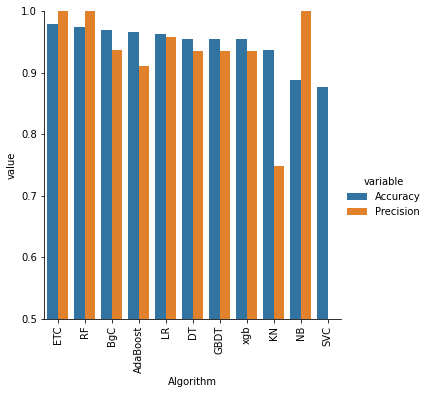

In [277]:
sns.catplot(x='Algorithm',y='value',
            hue='variable',data=performance_df1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
#improve model
# 1. Change the max_features parameter of Tfidf

In [103]:
#temp_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft':precision_scores '})

In [104]:
#perfomance_df.merge(temp_df,on='Algorithm')

In [278]:
 #Voting Classifer
svc=SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb=MultinomialNB()
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)

from sklearn.ensemble import VotingClassifier

In [279]:
voting=VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='soft')

In [280]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [281]:
y_pred=voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))


Accuracy 0.8924418604651163
Precision 1.0


In [282]:
# APPLYINNG STACKING
estimators=[('svm',svc),('nb',mnb),('et',etc)]
final_estimator=RandomForestClassifier()

In [283]:
from sklearn.ensemble import StackingClassifier

In [284]:
clf=StackingClassifier(estimators=estimators,final_estimator=final_estimator)

In [285]:
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9767441860465116
Precision 0.9256198347107438


In [288]:
import pickle
# pickle.dump(tfidf,open('vectorizer.pkl', 'wb')  )
pickle.dump(voting,open('model.pkl', 'wb'))

In [289]:
pickle.dump(tfidf,open('vectorize.pkl', 'wb'))